<a href="https://colab.research.google.com/github/harsh-jaiswal13/image-processing-notebooks/blob/main/LoG_Vs_DoG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  del sys.path[0]


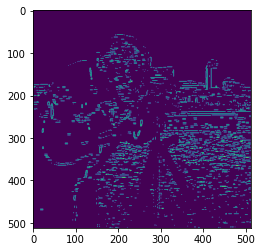

In [ ]:

import scipy as sp
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage import data    

# lena = sp.misc.lena() this function was deprecated in version 0.17
img = data.camera()  # use a standard image from skimage instead
# img = io.imread('/content/cube.jpg')
LoG = nd.gaussian_laplace(img , 2)
thres = np.absolute(LoG).mean() * 0.75
output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1

plt.imshow(output)
plt.show()

In [ ]:
img1=io.imread('/content/cube.jpg',as_gray=True)
p=nd.gaussian_laplace(img1,3, output=None, mode='reflect', cval=0.0)

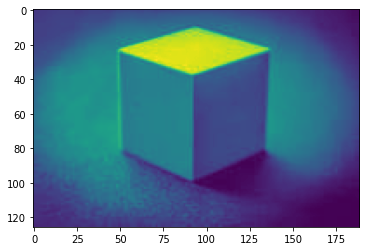

In [ ]:
plt.imshow(img1)

DoG

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

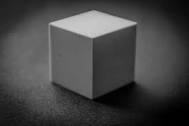

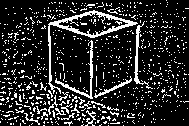

In [30]:
img=cv2.imread('/content/cube.jpg',0)
# img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(img)
low_g=cv2.GaussianBlur(img,(3,3),0)
high_g=cv2.GaussianBlur(img,(5,5),0)
dog=high_g-low_g
cv2_imshow(dog)
